# Servicios Web y APIs 

## Índice
1. [API Air Quality](#air)
2. [API de OpenWeather](#wea)
3. [API de la NASA](#nasa)
4. [Yahoo Finance](#yah)

En este Notebook vamos a llamar a diversas APIs. Antes de comenzar, es importante destacar dos conceptos:  

1) **Codificación de URLs**: Toda cadena de cadena de caracteres que se introduzca en una URL tiene que codificarse adecuadamente. En Python, podemos utilizar la función `quote()` del paquete `urllib.parse`

In [1]:
import urllib.parse
urllib.parse.quote(' ')

'%20'

2) **Peticiones HTTP**: la librería `requests` es la más utilizada para realizar peticiones HTTP en Python, permitiendo utilizar los métodos más comunes de este protocolo (GET, POST, PUT, etc.). Para más información entra en este [enlace](https://realpython.com/python-requests/)

También podemos utilizar la librería `urllib.request`

<a id="air"></a>
## API Air Quality

Esta API abierta proporciona información acerca de la calidad del aire en diversas ciudades. La lista de APIS se encuentra en https://api.openaq.org/  

En primer lugar vamos a llamar a la API **cities**, la cual nos informa de las ciudades disponibles

In [2]:
import urllib.request
import json

url1 = 'https://api.openaq.org/v2/cities'

pais = input('Introduzca las siglas del país (por ejemplo ES): ')

url = url1 + '?country=' + pais

datos = urllib.request.urlopen(url).read().decode()

js = json.loads(datos)

for item in js['results']:
    print(item['city'])

Introduzca las siglas del país (por ejemplo ES): ES
A Coruña
Agullana
Albacete
Alcanar
Alcover
Alicante/Alacant
Almeria
Almería
Ametlla de Mar, l'
Amposta
Araba/Álava
Asturias
Ávila
Badajoz
Badalona
Barberà del Vallès
Barcelona
Begur
Bellver de Cerdanya
Berga
Bizkaia
Burgos
Cáceres
Cádiz
Cantabria
Carboneras
Castellón/Castelló
CCAA Catalu�a
CCAA Com. Valenciana
CCAA Galicia
CCAA Pa�s Vasco
Ciudad Real
Constantí
Córdoba
Cubelles
Cuenca
Gandesa
Gavà
Gipuzkoa
Girona
Granada
Granollers
Guadalajara
Guiamets, els
Hospitalet de Llobregat, l'
Huelva
Huesca
Igualada
Illes Balears
Jaén
Juneda
La Rioja
Las Palmas
León
Lleida
Lugo
Madrid
Malaga
Málaga
Manlleu
Manresa
Marbella
Martorell
Mataró
Mollet del Vallès
Montcada i Reixac
Montseny
Murcia
Navarra
Niebla
Ourense
Palencia
Pallejà
Pardines
Perafort
Pontevedra
Ponts
Prat de Llobregat, el
Reus
Rubí
Sabadell
Salamanca
Santa Coloma de Gramenet
Santa Cruz de Tenerife
Sant Adrià de Besòs
Santa Margarida i els Monjos
Santa Maria de Palautordera
Sant An

Esto mismo podemos realizarlo con la librería `requests`, instalándola previamente.  
Esta librería también me permite utilizar el método POST de HTTP: `requests.post(...)`

In [3]:
import requests

url1 = 'https://api.openaq.org/v2/cities'

pais = input('Introduzca las siglas del país (por ejemplo ES): ')

datos = requests.get(url1, params={'country':pais})

js = datos.json()

for item in js['results']:
    print(item['city'])

Introduzca las siglas del país (por ejemplo ES): ES
A Coruña
Agullana
Albacete
Alcanar
Alcover
Alicante/Alacant
Almeria
Almería
Ametlla de Mar, l'
Amposta
Araba/Álava
Asturias
Ávila
Badajoz
Badalona
Barberà del Vallès
Barcelona
Begur
Bellver de Cerdanya
Berga
Bizkaia
Burgos
Cáceres
Cádiz
Cantabria
Carboneras
Castellón/Castelló
CCAA Catalu�a
CCAA Com. Valenciana
CCAA Galicia
CCAA Pa�s Vasco
Ciudad Real
Constantí
Córdoba
Cubelles
Cuenca
Gandesa
Gavà
Gipuzkoa
Girona
Granada
Granollers
Guadalajara
Guiamets, els
Hospitalet de Llobregat, l'
Huelva
Huesca
Igualada
Illes Balears
Jaén
Juneda
La Rioja
Las Palmas
León
Lleida
Lugo
Madrid
Malaga
Málaga
Manlleu
Manresa
Marbella
Martorell
Mataró
Mollet del Vallès
Montcada i Reixac
Montseny
Murcia
Navarra
Niebla
Ourense
Palencia
Pallejà
Pardines
Perafort
Pontevedra
Ponts
Prat de Llobregat, el
Reus
Rubí
Sabadell
Salamanca
Santa Coloma de Gramenet
Santa Cruz de Tenerife
Sant Adrià de Besòs
Santa Margarida i els Monjos
Santa Maria de Palautordera
Sant An

A continuación, llamamos a la API **latest**, que devuelve los últimos registros de una ciudad o país en concreto

In [4]:
ciudad = input('Introduzca el nombre de la ciudad: ')

url1 = 'https://api.openaq.org/v2/latest'
url2 = url1 + '?limit=1&city=' + urllib.parse.quote(ciudad)

# "El valor de xxx en Madrid a 30-11-2021 es de xxx µg/m³"

datos = urllib.request.urlopen(url2).read().decode()
js = json.loads(datos)

for item in js['results'][0]['measurements']:
    print('El valor de ', item['parameter'], 'en ', ciudad,
         'a', item['lastUpdated'], 'es de', item['value'],
          item['unit'])

Introduzca el nombre de la ciudad: Madrid
El valor de  no2 en  Madrid a 2023-05-28T06:00:00+00:00 es de 12.0 µg/m³
El valor de  co en  Madrid a 2023-05-28T06:00:00+00:00 es de 300.0 µg/m³
El valor de  no en  Madrid a 2023-05-28T06:00:00+00:00 es de 1.0 µg/m³
El valor de  so2 en  Madrid a 2023-05-28T07:00:00+00:00 es de 1.0 µg/m³


Parseamos el JSON de respuesta para obtener todos los niveles disponibles y la fecha de las mediciones

<a id="wea"></a>
## API de OpenWeather

Esta API permite obtener información climática. Puedes encontrar la documentación en https://openweathermap.org/api.   
Para obtener la API key hay que registrar un email válido, al cual será enviada la clave.  

Vamos a obtener la predicción de velocidad del viento para una ciudad a través de [esta API](https://openweathermap.org/forecast5)

In [5]:
import urllib.request
import json

api_key = '3886d5996f84c5b9a5c953b027fc2306'
ciudad = input('Introduzca una ciudad y código de País: ')
url = 'https://api.openweathermap.org/data/2.5/forecast?q='+ciudad+'&appid='+api_key

datos = urllib.request.urlopen(url).read().decode()

js = json.loads(datos)

ts = []
speed = []

for item in js['list']:
    ts.append(item['dt_txt'])
    speed.append(item['wind']['speed'])

Introduzca una ciudad y código de País: Santander,ES


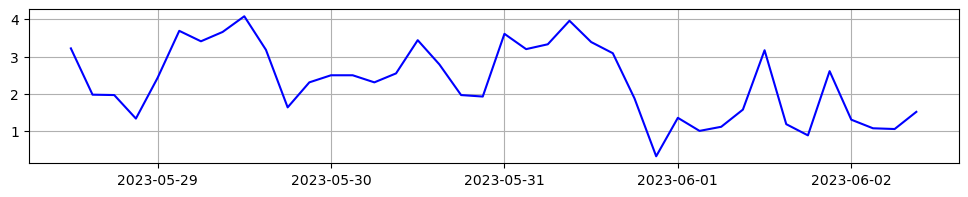

In [6]:
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
 
ts2 = [datetime.strptime(d,'%Y-%m-%d %H:%M:%S') for d in ts]
fig = plt.figure(figsize=(12,2))
plt.grid()

plt.plot(ts2,speed,color='blue');

<a id="nasa"></a>
## API de la NASA
[Documentación](https://api.nasa.gov/)  
Vamos a obtener fotos de marte a través de la API "Mars Rover Photos" del día 01/09/2022

In [7]:
url = 'https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos'
res = requests.get(url,params={'earth_date':'2022-09-01', 'api_key':'DEMO_KEY'}).json()
res

{'photos': [{'id': 1024497,
   'sol': 3580,
   'camera': {'id': 20,
    'name': 'FHAZ',
    'rover_id': 5,
    'full_name': 'Front Hazard Avoidance Camera'},
   'img_src': 'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/03580/opgs/edr/fcam/FLB_715310011EDR_F0971170FHAZ00302M_.JPG',
   'earth_date': '2022-09-01',
   'rover': {'id': 5,
    'name': 'Curiosity',
    'landing_date': '2012-08-06',
    'launch_date': '2011-11-26',
    'status': 'active'}},
  {'id': 1024498,
   'sol': 3580,
   'camera': {'id': 20,
    'name': 'FHAZ',
    'rover_id': 5,
    'full_name': 'Front Hazard Avoidance Camera'},
   'img_src': 'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/03580/opgs/edr/fcam/FRB_715310011EDR_F0971170FHAZ00302M_.JPG',
   'earth_date': '2022-09-01',
   'rover': {'id': 5,
    'name': 'Curiosity',
    'landing_date': '2012-08-06',
    'launch_date': '2011-11-26',
    'status': 'active'}},
  {'id': 1024499,
   'sol': 3580,
   'camera': {'id': 21,


In [8]:
foto_url = res['photos'][0]['img_src']

In [9]:
from IPython.display import Image

display(Image(url=foto_url))

<a id="yah"></a>
## Yahoo Finance
Muchas veces, usamos APIs a través de librerías de Python. Por ejemplo, la librería `yfinance` permite conectarnos a la API de Yahoo finance. Puedes encontrar la documentación en [este enlace](https://aroussi.com/post/python-yahoo-finance)

In [12]:
!pip install yfinance

     ---------------------------------------- 60.3/60.3 kB ? eta 0:00:00
     ------------------------------------- 502.3/502.3 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1


In [10]:
import pandas as pd
import yfinance as yf

import time

In [11]:
data = yf.download('AMZN',period='5d',interval='1m')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-05-22 09:30:00-04:00,116.769997,116.769997,116.300003,116.389900,116.389900,1898510
2023-05-22 09:31:00-04:00,116.389999,116.490501,116.330002,116.381401,116.381401,221079
2023-05-22 09:32:00-04:00,116.370003,116.620003,116.349998,116.519997,116.519997,224999
2023-05-22 09:33:00-04:00,116.525002,116.589996,116.230003,116.389999,116.389999,303885
2023-05-22 09:34:00-04:00,116.400002,116.400002,116.209999,116.220001,116.220001,231527
...,...,...,...,...,...,...
2023-05-26 15:55:00-04:00,119.980003,120.279999,119.974998,120.250000,120.250000,682589
2023-05-26 15:56:00-04:00,120.254997,120.264999,120.180000,120.260002,120.260002,370573
2023-05-26 15:57:00-04:00,120.264999,120.299004,120.139999,120.150002,120.150002,504187
